## Learn by example

Let's make a first plot of real data. We will use NOAA's Global Monitoring Laboratory data on [Trends in Atmospheric Carbon Dioxide](https://gml.noaa.gov/ccgg/trends/data.html).

First, import packages to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

Load CO2 data into a Pandas dataframe. You can load it directly from the URL (option 1), or first download the CSV to your computer and then load it (option 2).

In [2]:
# option 1: load data directly from URL
# url = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_weekly_mlo.csv"
# df = pd.read_csv(url, header=47, na_values=[-999.99])

# option 2: download first, then load csv
filename = "co2_weekly_mlo.csv"
df = pd.read_csv(filename,
                 header=34,  # use row 34 as column names. Whatever above it is ignored
                 na_values=[-999.99]  # substitute -999.99 for NaN (Not a Number), data not available
                 )
# check how the dataframe (table) looks like
df

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.39
1,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.05
2,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.59
3,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.64
4,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06
...,...,...,...,...,...,...,...,...,...
2566,2023,7,23,2023.5575,421.28,4,418.03,397.30,141.60
2567,2023,7,30,2023.5767,420.83,6,418.10,396.80,141.69
2568,2023,8,6,2023.5959,420.02,6,417.36,395.65,141.41
2569,2023,8,13,2023.6151,418.98,4,417.25,395.24,140.89


Create a new column called `date`, that combines the information from three separate columns: `year`, `month`, `day`.

In [3]:
# function to_datetime translates the full date into a pandas datetime object,
# that is, pandas knows this is a date, it's not just a string
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
# make 'date' column the dataframe index
df = df.set_index('date')
# now see if everything is ok
df

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
date,,,,,,,,,
1974-05-19,1974,5,19,1974.3795,333.37,5,NaN,NaN,50.39
1974-05-26,1974,5,26,1974.3986,332.95,6,NaN,NaN,50.05
1974-06-02,1974,6,2,1974.4178,332.35,5,NaN,NaN,49.59
1974-06-09,1974,6,9,1974.4370,332.20,7,NaN,NaN,49.64
1974-06-16,1974,6,16,1974.4562,332.37,7,NaN,NaN,50.06
...,...,...,...,...,...,...,...,...,...
2023-07-23,2023,7,23,2023.5575,421.28,4,418.03,397.30,141.60
2023-07-30,2023,7,30,2023.5767,420.83,6,418.10,396.80,141.69
2023-08-06,2023,8,6,2023.5959,420.02,6,417.36,395.65,141.41


We are now ready for our first plot! Let's see the weekly CO2 average.

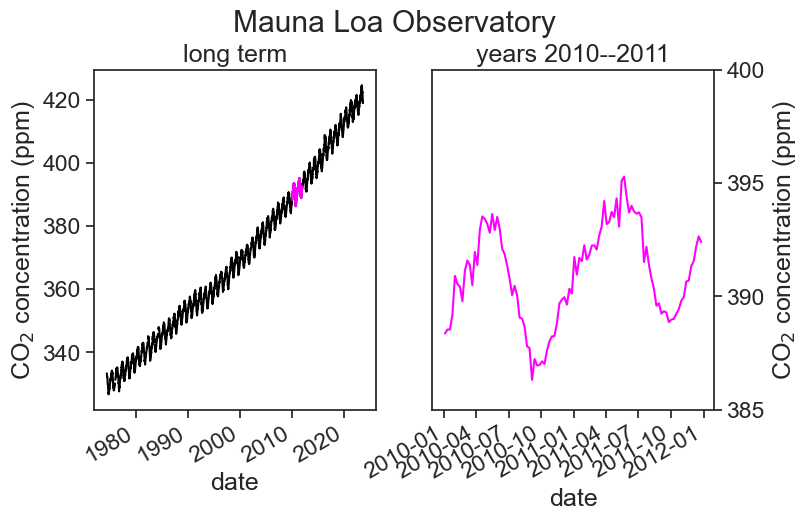

In [34]:
# %matplotlib widget
# uncomment the above line if you want dynamic control of the figure when using VSCode
fig, (ax1, ax2) = plt.subplots(1, 2,  # 1 row, 2 columns
                               figsize=(8,5)  # width, height, in inches
                               )
# left panel
ax1.plot(df['average'], color="black")
ax1.plot(df.loc['2010-01-01':'2011-12-31','average'], color="magenta")
ax1.set(xlabel="date",
       ylabel=r"CO$_2$ concentration (ppm)",
       title="long term");
# right panel
ax2.plot(df.loc['2010-01-01':'2011-12-31','average'], color="magenta")
ax2.set(xlabel="date",
        ylabel=r"CO$_2$ concentration (ppm)",
        ylim=[385, 400],  # choose y limits
        yticks=np.arange(385, 401, 5),  # choose ticks
        title="years 2010--2011");
# put ticks and label on the right for ax2
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
# title above both panels
fig.suptitle("Mauna Loa Observatory")
# makes slanted dates
plt.gcf().autofmt_xdate()

The dates in the x-label are not great. Let's try to make them prettier.

In [5]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib

/var/folders/c3/7hp0d36n6vv8jc9hm2440__00000gn/T/ipykernel_20949/850389963.py:42: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.savefig("CO2-graph.png", dpi=300)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 6.
  fig.canvas.print_figure(bytes_io, **kw)


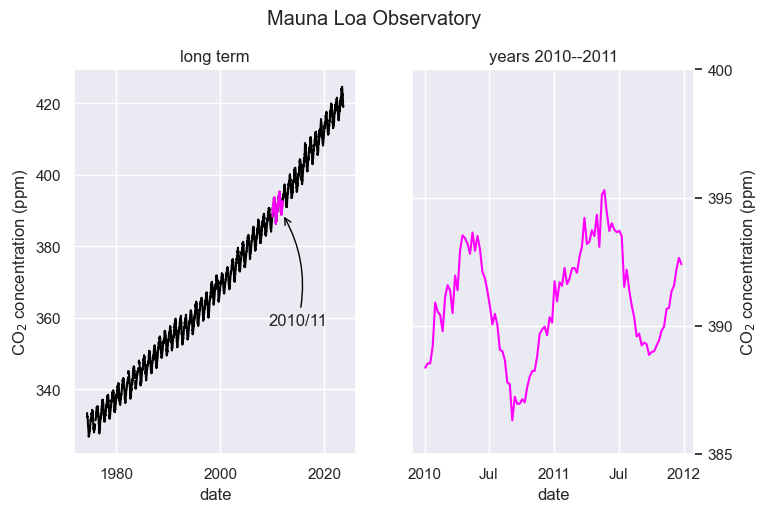

In [78]:
# %matplotlib widget
# uncomment the above line if you want dynamic control of the figure when using VSCode
fig, (ax1, ax2) = plt.subplots(1, 2,  # 1 row, 2 columns
                               figsize=(8,5)  # width, height, in inches
                               )
# left panel
ax1.plot(df['average'], color="black")
ax1.plot(df.loc['2010-01-01':'2011-12-31','average'], color="magenta")
ax1.set(xlabel="date",
       ylabel=r"CO$_2$ concentration (ppm)",
       title="long term");
# right panel
ax2.plot(df.loc['2010-01-01':'2011-12-31','average'], color="magenta")
ax2.set(xlabel="date",
        ylabel=r"CO$_2$ concentration (ppm)",
        ylim=[385, 400],  # choose y limits
        yticks=np.arange(385, 401, 5),  # choose ticks
        title="years 2010--2011");
# put ticks and label on the right for ax2
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
# title above both panels
fig.suptitle("Mauna Loa Observatory", y=1.00)

locator = mdates.AutoDateLocator(minticks=3, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

locator = mdates.AutoDateLocator(minticks=4, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

ax1.annotate(
    "2010/11",
    xy=('2011-12-25', 389),  xycoords='data',
    xytext=(-10, -80), textcoords='offset points',
    arrowprops=dict(arrowstyle="->",
                    color="black",
                    connectionstyle="arc3,rad=0.2"))
fig.savefig("CO2-graph.png", dpi=300)

The dates on the horizontal axis are determined thus:

1. `locator = mdates.AutoDateLocator(minticks=3, maxticks=5)`  
  This deremines the location of the ticks (between 3 and 5 ticks, whatever "works best")
2. `ax1.xaxis.set_major_locator(locator)`  
   This actually puts the ticks in the positions determined above
3. `formatter = mdates.ConciseDateFormatter(locator)`  
   This says that the labels will be placed at the locations determined in 1.
4. `ax1.xaxis.set_major_formatter(formatter)`  
   Finally, labels are written down

The arrow is placed in the graph using `annotate`. It has a tricky syntax and a million options. Read [Jake VanderPlas's](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html#Arrows-and-Annotation) excellent examples to learn more.


## Tweaks

Let's change a lot of plotting options to see how things could be different.

Text(-100, 40, '2010/11')

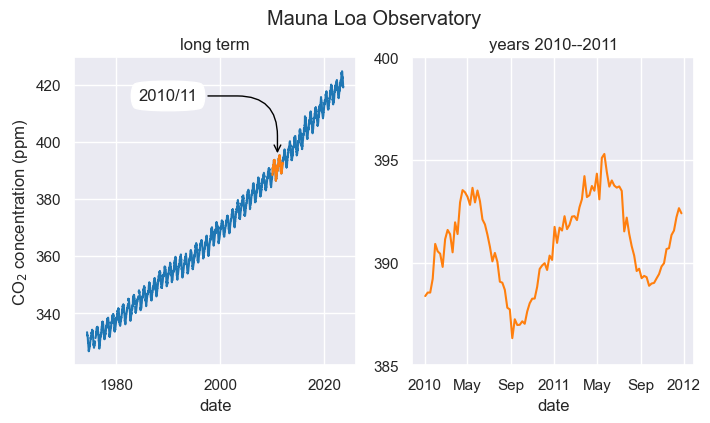

In [77]:
sns.set(style="darkgrid")
sns.set_context("notebook")

# %matplotlib widget
# uncomment the above line if you want dynamic control of the figure when using VSCode
fig, (ax1, ax2) = plt.subplots(1, 2,  # 1 row, 2 columns
                               figsize=(8,4)  # width, height, in inches
                               )
# left panel
ax1.plot(df['average'], color="tab:blue")
ax1.plot(df.loc['2010-01-01':'2011-12-31','average'], color="tab:orange")
ax1.set(xlabel="date",
       ylabel=r"CO$_2$ concentration (ppm)",
       title="long term");
# right panel
ax2.plot(df.loc['2010-01-01':'2011-12-31','average'], color="tab:orange")
ax2.set(xlabel="date",
        ylim=[385, 400],  # choose y limits
        yticks=np.arange(385, 401, 5),  # choose ticks
        title="years 2010--2011");
# title above both panels
fig.suptitle("Mauna Loa Observatory", y=1.00)

locator = mdates.AutoDateLocator(minticks=3, maxticks=5)
formatter = mdates.ConciseDateFormatter(locator)
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(formatter)

locator = mdates.AutoDateLocator(minticks=5, maxticks=8)
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

ax1.annotate(
    "2010/11",
    xy=('2010-12-25', 395),  xycoords='data',
    xytext=(-100, 40), textcoords='offset points',
    bbox=dict(boxstyle="round4,pad=.5", fc="white"),
    arrowprops=dict(arrowstyle="->",
                    color="black",
                    connectionstyle="angle,angleA=0,angleB=-90,rad=40"))

The main changes were:

1. Using the Seaborn package, we changed the fontsize and the overall plot style. [Read more](https://seaborn.pydata.org/tutorial/aesthetics.html).  
   `sns.set(style="darkgrid")`  
   `sns.set_context("notebook")`
1. We changed the colors of the lineplots. To know what colors exist, [click here](https://matplotlib.org/stable/gallery/color/named_colors.html).
1. The arrow annotation has a different style. [Read more](https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html#Arrows-and-Annotation).